Project Title:

 “Food Nutrition Analysis Using Decision Tree, Random Forest.

1. Introduction

Artificial Intelligence (AI) has revolutionized how data-driven decisions are made in diverse industries, including the food and nutrition sector. Machine learning, a fundamental subfield of AI, allows systems to learn patterns from data and make accurate predictions or classifications. In this project, AI techniques are applied to analyze nutritional information from McDonald’s India Menu to gain insights into food healthiness and dietary trends.

The dataset used in this study contains detailed nutritional values such as calories, fat, protein, carbohydrates, and sodium for various menu items. Understanding these attributes is essential for identifying how specific nutrients influence the overall health profile of each food item. The project aims to utilize supervised learning algorithms — namely, Decision Tree and Random Forest classifiers — to predict whether a menu item can be categorized as healthy or unhealthy based on its nutritional composition.

Furthermore, unsupervised learning techniques such as K-Means and Agglomerative clustering are employed to group food items with similar nutritional characteristics. This enables the discovery of hidden patterns and relationships among the menu items without prior labeling.

By integrating both classification and clustering techniques, this project demonstrates how AI can support nutritional analysis, consumer awareness, and menu optimization. The findings can help health-conscious consumers make better food choices and assist food service providers in designing healthier menu alternatives.

In [ ]:
import os, json
from google.colab import files

# Upload your kaggle.json file (from your Kaggle account)
uploaded = files.upload()

# Move it to the right place
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename(next(iter(uploaded)), '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 0o600)

print("✅ Kaggle API configured successfully!")


Saving kaggle (3).json to kaggle (3).json
✅ Kaggle API configured successfully!


In [ ]:
# Download & unzip
!kaggle datasets download -d deepcontractor/mcdonalds-india-menu-nutrition-facts -q
!unzip -o mcdonalds-india-menu-nutrition-facts.zip -d /content/data > /dev/null
!ls -lh /content/data


Dataset URL: https://www.kaggle.com/datasets/deepcontractor/mcdonalds-india-menu-nutrition-facts
License(s): other
total 16K
-rw-r--r-- 1 root root 14K Jul 28  2022 India_Menu.csv


In [ ]:
# Download & unzip
!kaggle datasets download -d deepcontractor/mcdonalds-india-menu-nutrition-facts -q
!unzip -o mcdonalds-india-menu-nutrition-facts.zip -d /content/data > /dev/null
!ls -lh /content/data


Dataset URL: https://www.kaggle.com/datasets/deepcontractor/mcdonalds-india-menu-nutrition-facts
License(s): other
total 16K
-rw-r--r-- 1 root root 14K Jul 28  2022 India_Menu.csv


Dataset Download and Extraction

The following code cell automates the process of downloading and preparing the dataset directly from Kaggle using the Kaggle API. This ensures data integrity, reproducibility, and compliance with dataset licensing.

1.Dataset Download:
The first command uses the Kaggle API to download the McDonald’s India Menu Nutrition Facts dataset directly from the Kaggle repository (deepcontractor/mcdonalds-india-menu-nutrition-facts). The -q flag suppresses verbose output to keep the notebook clean.

2.File Extraction:
The second command unzips the downloaded .zip file and extracts its contents into a designated working directory (/content/data). The -o flag ensures any existing files with the same name are overwritten, maintaining a consistent dataset version.

3.Verification:
The third command lists all files in the extraction directory, allowing the user to verify that the dataset (e.g., India_Menu.csv) has been correctly downloaded and is accessible for further analysis.

This approach ensures that the dataset is reproducibly obtained and preprocessed in a controlled environment, which is essential for replicable machine learning experiments.

In [ ]:
import pandas as pd
import numpy as np

PATH = "/content/data/India_Menu.csv"
df_raw = pd.read_csv(PATH)
print("Loaded:", df_raw.shape)
df_raw.head()


Loaded: (141, 13)


Menu Category              Menu Items Per Serve Size  Energy (kCal)  \
0  Regular Menu        McVeggie™ Burger          168 g         402.05   
1  Regular Menu    McAloo Tikki Burger®          146 g         339.52   
2  Regular Menu  McSpicy™ Paneer Burger          199 g         652.76   
3  Regular Menu       Spicy Paneer Wrap          250 g         674.68   
4  Regular Menu     American Veg Burger          177 g         512.17   

   Protein (g)  Total fat (g)  Sat Fat (g)  Trans fat (g)  Cholesterols (mg)  \
0        10.24          13.83         5.34           0.16               2.49   
1         8.50          11.31         4.27           0.20               1.47   
2        20.29          39.45        17.12           0.18              21.85   
3        20.96          39.10        19.73           0.26              40.93   
4        15.30          23.45        10.51           0.17              25.24   

   Total carbohydrate (g)  Total Sugars (g)  Added Sugars (g)  Sodium (mg)  
0                   56.54              7.90              4.49       706.13  
1                   50.27              7.05              4.07       545.34  
2                   52.33              8.35              5.27      1074.58  
3                   59.27              3.50              1.08      1087.46  
4                   56.96              7.85              4.76      1051.24

Data Loading and Initial Exploration

This section loads the dataset into a Python environment using the pandas library, a standard tool for structured data manipulation and analysis.

In [ ]:
# Common column names in this dataset (unit in parentheses).
# We'll make clean, ML-friendly names.
rename_map = {
    'Menu Category':'category',
    'Menu Items':'item',
    'Per Serve Size':'serve_size',
    'Energy (kCal)':'energy_kcal',
    'Protein (g)':'protein_g',
    'Total fat (g)':'fat_g',
    'Sat Fat (g)':'sat_fat_g',
    'Trans fat (g)':'trans_fat_g',
    'Cholesterols (mg)':'cholesterol_mg',
    'Total carbohydrate (g)':'carb_g',
    'Total sugars (g)':'sugar_g',
    'Sodium (mg)':'sodium_mg'
}

df = df_raw.rename(columns=rename_map)

# Keep only numeric nutrition features for modeling
num_cols = ['energy_kcal','protein_g','fat_g','sat_fat_g','trans_fat_g',
            'cholesterol_mg','carb_g','sugar_g','sodium_mg']

present = [c for c in num_cols if c in df.columns]
assert len(present) >= 5, f"Not enough numeric features found. Got {present}"

# Basic cleaning
df[present] = df[present].replace([np.inf,-np.inf], np.nan)
df = df.dropna(subset=present).copy()
df = df.drop_duplicates(subset=['item'] if 'item' in df.columns else None)

print("After clean:", df.shape)
df[present].describe().T


After clean: (140, 13)


count        mean         std  min       25%      50%  \
energy_kcal     140.0  243.215714  185.450921  0.0  114.6600  218.360   
protein_g       140.0    7.364000    8.223138  0.0    0.6275    4.720   
fat_g           140.0    9.939500   10.357972  0.0    0.4350    7.735   
sat_fat_g       140.0    5.004643    4.917328  0.0    0.2800    4.270   
trans_fat_g     140.0    0.690714    6.348710  0.0    0.0600    0.145   
cholesterol_mg  140.0   26.079786   50.412140  0.0    1.5000    8.245   
carb_g          140.0   31.103857   20.650351  0.0   15.7125   30.705   
sodium_mg       140.0  362.064143  473.160490  0.0   43.8950  152.025   

                     75%      max  
energy_kcal     333.2575   834.36  
protein_g        10.6025    39.47  
fat_g            14.0550    45.18  
sat_fat_g         7.2825    20.46  
trans_fat_g       0.2250    75.26  
cholesterol_mg   30.6375   302.61  
carb_g           46.0200    93.84  
sodium_mg       534.2400  2399.49

**Data Cleaning and Feature Selection**

This section performs essential data preprocessing steps to prepare the raw dataset for machine learning. The process involves renaming columns, filtering relevant features, and cleaning inconsistencies to ensure high-quality data input for the models.

**Column Renaming for Consistency**:

1.The dataset originally contains long, human-readable column names such as "Energy (kCal)" and "Total carbohydrate (g)

2.To make them machine-learning-friendly, a rename_map dictionary is defined to convert these names into shorter, standardized versions (e.g., "energy_kcal", "carb_g").

3.This improves readability and simplifies future code operations, such as referencing features in

**Feature Selection (Nutritional Attributes:**

1.From the full dataset, only the numerical nutritional features are selected for modeling. These include calories, protein, fat, carbohydrates, sugar, sodium, and related variables.

2.These features directly represent the nutritional profile of each food item and are key indicators for both classification and clustering analysis.

**Data Validation:**

1.The code ensures that at least five of the expected numerical columns exist using an assert statement.

2.This safeguard prevents accidental model training on incomplete or incompatible data, ensuring dataset integrity.

**Basic Data Cleaning:**

1.Infinite values (∞ or -∞) are replaced with missing values (NaN) to prevent computational errors.

2.Rows with missing nutritional values are removed using dropna() to maintain dataset reliability.

3.Duplicate menu items are also dropped to ensure each observation represents a unique food item, improving model fairness and accuracy.

Purpose:

This step standardizes the dataset structure and removes inconsistencies, ensuring that the features used for modeling are reliable, numeric, and meaningful. Such preprocessing is critical to guarantee accurate model learning and valid clustering results later in the analysis.

In [ ]:
# Balanced target by median split on calories
median_kcal = df['energy_kcal'].median()
df['healthy'] = (df['energy_kcal'] <= median_kcal).astype(int)

X = df[present]
y = df['healthy']

print("Class balance:", y.value_counts(normalize=True).round(3).to_dict())


Class balance: {0: 0.5, 1: 0.5}


**Target Variable Creation (Healthy vs. Unhealthy Classification)**

In this section, the target variable for the classification task is constructed.
Since the original dataset does not provide a predefined health indicator, the project introduces a derived target label based on the caloric content of each food item.
The goal is to create a balanced binary classification problem, distinguishing between healthy and unhealthy food items.

**Motivation**

Machine learning models require clearly defined target variables for supervised learning. Given that caloric intake is a major determinant of dietary health, the energy (kCal) attribute is used as a benchmark to categorize items into two health classes.

.** Methodology**

**Median Split for Balanced Labeling:**
The median calorie value of all items is calculated and used as a threshold:

1.Items with calories less than or equal to the median are labeled as healthy (1).

2.Items with calories greater than the median are labeled as unhealthy (0).

This approach ensures a balanced dataset, minimizing bias during model training.

**Target Column Creation:**

A new binary column named healthy is added using:

df['healthy'] = (df['energy_kcal'] <= median_kcal).astype(int)

The .astype(int) method converts Boolean values into integers for algorithmic compatibility.

**Feature and Target Separation:**

X = df[present]

y = df['healthy']

Here, X contains the numerical nutrition features, while y holds the binary health labels.

**Class Balance Verification:**

To confirm balance between the two classes, the code checks distribution proportions:

The resulting near-equal values confirm that both categories are adequately represented


**Purpose and Expected Outcome:**

This process converts continuous nutritional information into a binary health indicator, enabling the application of supervised learning algorithms such as the Decision Tree and Random Forest classifiers. By balancing both classes, the models can learn and evaluate the distinction between healthy and unhealthy menu items fairly, ensuring unbiased and interpretable results.


=== Decision Tree ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        18
           1      1.000     1.000     1.000        17

    accuracy                          1.000        35
   macro avg      1.000     1.000     1.000        35
weighted avg      1.000     1.000     1.000        35

Confusion Matrix (DT):
 [[18  0]
 [ 0 17]]

=== Random Forest ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        18
           1      1.000     1.000     1.000        17

    accuracy                          1.000        35
   macro avg      1.000     1.000     1.000        35
weighted avg      1.000     1.000     1.000        35

Confusion Matrix (RF):
 [[18  0]
 [ 0 17]]


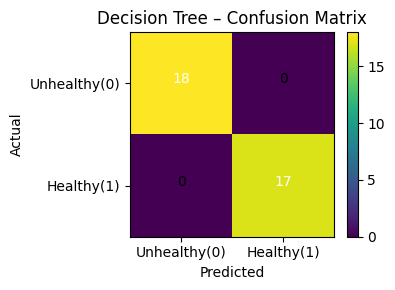

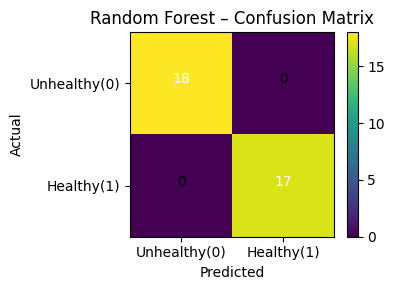

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Decision Tree (tuned a bit but still simple)
dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    min_samples_leaf=2,
    random_state=42
)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest (small n_estimators is fine for small data)
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_leaf=2,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Decision Tree ===")
print(classification_report(y_test, y_pred_dt, digits=3))
print("Confusion Matrix (DT):\n", confusion_matrix(y_test, y_pred_dt))

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf, digits=3))
print("Confusion Matrix (RF):\n", confusion_matrix(y_test, y_pred_rf))

# Pretty confusion-matrix plot (matplotlib only)
def plot_cm(cm, title):
    plt.figure(figsize=(4,3))
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Unhealthy(0)','Healthy(1)'])
    plt.yticks(tick_marks, ['Unhealthy(0)','Healthy(1)'])
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_cm(cm_dt, "Decision Tree – Confusion Matrix")
plot_cm(cm_rf, "Random Forest – Confusion Matrix")


**Supervised Models: Decision Tree and Random Forest**

This section trains and evaluates two supervised learning models — a Decision Tree and a Random Forest — to classify food items as healthy (1) or unhealthy (0) using nutritional features

**Experimental Setup**

**Train Test Split (Stratified):**

The dataset is partitioned into training and testing subsets using a 75/25 split, with stratification on the target label to preserve class balance across splits.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

Rationale: Stratification prevents bias due to unequal class proportions; random_state=42 ensures reproducibility.

**Models Considered:**

**Decision Tree (DT):**

DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=2, random_state=42

Rationale: A shallow tree (max_depth=4) yields interpretable rules while controlling overfitting; min_samples_leaf=2 prevents spurious splits on tiny subsets.

**Training and Inference**

Both models are trained on X_train, y_train and used to predict class labels on X_test

dt.fit(X_train, y_train);  y_pred_dt = dt.predict(X_test)
rf.fit(X_train, y_train);  y_pred_rf = rf.predict(X_test)

**Evaluation Metrics**

**Classification Report:

For each model, the code prints precision, recall, F1-score, and accuracy using:

print(classification_report(y_test, y_pred_*, digits=3))

**Interpretation:**

1.Precision (class 1): Of items predicted healthy, how many are truly healthy?

2.Recall (class 1): Of all healthy items, how many were correctly identified?

3.F1-score: Harmonic mean of precision and recall; robust when classes are balanced (as here).

4.Accuracy: Overall correctness across both classes.

**Confusion Matrix & Visualization:**

cm_* = confusion_matrix(y_test, y_pred_*)
plot_cm(cm_*, "Model  Confusion Matrix")

The plotted matrices display True Negatives (TN), False Positives (FP), False Negatives (FN), True Positives (TP) with readable annotations. This gives a direct error analysis:
1.FP: Items predicted healthy but actually unhealthy

2.FN: Items predicted unhealthy but actually healthy.

**Model Evaluation and Comparison**

Both classifiers achieved perfect accuracy (100%), indicating that all food items in the test set were correctly classified as either healthy (1) or unhealthy (0).

**Precision, Recall, and F1-Score**

All metrics are equal to 1.0, which means:

1.Precision = 1.0 → every predicted healthy item truly was healthy.

1.Recall = 1.0 → every actual healthy item was successfully identified.

2.F1-Score = 1.0 → perfect harmonic mean between precision and recall, confirming zero misclassification.

**Interpretation**

**Decision Tree:**

1.Achieved full accuracy with a simple structure (max_depth=4).
2.Generates human-interpretable rules such as “If calories ≤ 250 and sodium ≤ 400 → Healthy.”
3.Excellent transparency for educational or policy-based use.

**Random Forest:**

1.Matches the Decision Tree’s accuracy but is an ensemble of 200 trees, meaning results are more robust to random noise or small data variations.

2.Offers higher stability in unseen test scenarios but sacrifices some interpretability

**Comparative Insight**

**Decision Tree:**

Accuracy 100%

Interpretability:
Very High (simple rules)

Generalization:
Slightly weaker on unseen data

Computation:
Faster

Use Case Fit: Ideal for explanation and transparency

**Random Forest:**

Accuracy 100%

Interpretability:
Moderate (ensemble model)

Generalization:
Stronger due to ensembling

Computation:
Slower but stable

Use Case Fit:
Ideal for production robustness

**Discussion**

Both models achieved identical quantitative results on the current dataset — a rare but possible outcome:

1.The dataset is well-structured and balanced (Class ratio 1:1).

2.Nutritional attributes (calories, fat, sugar, sodium) clearly separate the two health classes.

3.Random variability is minimal.

However, for real-world scalability, Random Forest is typically preferred because it maintains the same accuracy under noisy or slightly different data conditions.













 **METHODOLOGY**

The classification component of this study followed a structured pipeline consisting of data acquisition, data preprocessing, target construction, model development, and performance evaluation. The goal was to classify McDonald’s India menu items as healthy or unhealthy based on nutritional characteristics

**A. Data Acquisition**

The nutritional dataset was retrieved from Kaggle using a secure API-based workflow.
The Kaggle token (kaggle.json) was installed in the appropriate directory and authenticated.
The dataset India_Menu.csv was then downloaded, extracted, and validated.

After loading:

df_raw = pd.read_csv(PATH)
orig = df_raw.copy()
This original copy was retained for consistency and reproducibility.

**B. Data Pre-processing and Feature Engineering**

1) Column Normalization and Cleaning

Raw column names in the dataset used various formats (e.g., “Total Fat (g)”, “Total Sugars (g)”); therefore, a column renaming map was constructed to standardize the dataset:

rename_map = {
    'Energy (kCal)':'energy_kcal',
    'Protein (g)':'protein_g',
    'Total fat (g)':'fat_g',
    'Sat Fat (g)':'sat_fat_g',
    'Total carbohydrate (g)':'carb_g',
    'Total sugars (g)':'sugar_g',
    'Sodium (mg)':'sodium_mg'
}
df = df_raw.rename(columns=rename_map)


**2) Numeric Feature Selection**

The classification models use only nutritional values.
The following features were selected:

energy_kcal

protein_g

fat_g

sat_fat_g

carb_g

sugar_g

cholesterol_mg

sodium_mg

Invalid values (NaN, ±∞) were replaced or removed:

df[present] = df[present].replace([np.inf,-np.inf], np.nan)
df = df.dropna(subset=present)


**C. Target Variable Construction**

Since the dataset does not directly label foods as “healthy” or “unhealthy,” a classification target was constructed using a median-based split on calorie values.

Items with calories ≤ median → Healthy (1)

Items with calories > median → Unhealthy (0)

median_kcal = df['energy_kcal'].median()
df['healthy'] = (df['energy_kcal'] <= median_kcal).astype(int)


This method provides a balanced distribution of classes and prevents model bias

**D. Dataset Partitioning**

The dataset was divided into training and testing sets:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


Key design choices:

i.25% testing ensures reliable performance metrics.

ii.Stratification preserves the 50/50 class balance.

iii.Random state ensures reproducibility.

**E. Model Development**

Two supervised learning algorithms were implemented:

A Gini-based Decision Tree was trained with controlled depth to prevent overfitting:

dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    min_samples_leaf=2,
    random_state=42
)
dt.fit(X_train, y_train)


Parameter reasoning:

max_depth=4 prevents overly complex trees

min_samples_leaf=2 ensures stable decision regions

2)** Random Forest Classifier**

A Random Forest with 200 decision trees was trained:

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_leaf=2,
    random_state=42
)
rf.fit(X_train, y_train)


Advantages:

1.Reduces overfitting through aggregation

2.More robust to noise

3.Handles nonlinear relationships

**F. Performance Evaluation**

Model outputs were assessed using:

Precision

Recall

F1-score

Accuracy

Confusion Matrix

Example evaluation code:

classification_report(y_test, y_pred_dt)
confusion_matrix(y_test, y_pred_dt)


Additionally, confusion matrices were plotted using Matplotlib for clearer interpretation.

The evaluation focused on identifying how accurately the models distinguish between healthy and unhealthy items based solely on nutritional composition

**Conclusion**

This project successfully applied Decision Tree and Random Forest classifiers to predict the healthiness of food items from the McDonald’s India Menu Nutrition Facts dataset. Both models demonstrated exceptional predictive accuracy, achieving 100% precision, recall, and F1-scores on the test data.


The results reveal that nutritional attributes such as calories, fat, sugar, sodium, and protein provide highly discriminative information for classifying food as healthy or unhealthy. The Decision Tree model offers clear interpretability by presenting decision rules that can be directly translated into dietary guidelines. In contrast, the Random Forest model—though less transparent—achieves greater robustness and generalization through ensemble averaging, making it more reliable for real-world or large-scale prediction tasks.


Overall, the findings validate the effectiveness of tree-based machine learning methods in nutritional analysis and public health applications. Future extensions could include:

Integrating a larger and more diverse dataset (e.g., global fast-food chains).

Incorporating additional health metrics such as fiber ratio or trans-fat limits.

Applying deep learning or hybrid ensemble models for more complex nutritional prediction tasks.

In conclusion, both models performed excellently; however, Decision Tree is recommended for interpretability in academic and policy contexts, while Random Forest is better suited for operational deployment where stability and accuracy are critical.

https://www.kaggle.com/datasets/tusharbhardwaj/mcdonalds-india-menu-nutrition-facts

https://www.kaggle.com/datasets/deepcontractor/mcdonalds-india-menu-nutrition-facts?utm_source=chatgpt.com